In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Accessing my file
file_path = '/content/drive/My Drive/Colab Notebooks/Hackbio/LGG_filtered_data.csv'
df = pd.read_csv(file_path, index_col=0)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Upload metadata
from google.colab import files
uploaded = files.upload()

Saving metadata.csv to metadata.csv


In [ ]:
data2=pd.read_csv('metadata.csv')
data2.head()


,barcode,IDH.specific.DNA.Methylation.Cluster,IDH_status
0,TCGA-E1-A7YQ-01A-11D-A34K-05,IDHwt-K1,WT
1,TCGA-S9-A7QW-01A-11D-A34D-05,IDHmut-K2,Mutant
2,TCGA-HT-7874-01A-11D-2399-05,IDHmut-K3,Mutant
3,TCGA-FG-A4MU-01B-11D-A28N-05,IDHwt-K2,WT
4,TCGA-DU-8162-01A-21D-2254-05,IDHwt-K2,WT


In [ ]:
data2.shape

(513, 3)

In [ ]:
lgg_df = df
metadata = data2

In [ ]:
print("lgg_df Columns:", lgg_df.columns)

lgg_df Columns: Index(['TCGA-E1-A7YQ-01A-11D-A34K-05', 'TCGA-S9-A7QW-01A-11D-A34D-05',
       'TCGA-HT-7874-01A-11D-2399-05', 'TCGA-FG-A4MU-01B-11D-A28N-05',
       'TCGA-DU-8162-01A-21D-2254-05', 'TCGA-DB-A4XG-01A-11D-A27L-05',
       'TCGA-FG-A60L-01A-12D-A31M-05', 'TCGA-DU-A7TG-01A-21D-A34K-05',
       'TCGA-TM-A84O-01A-11D-A368-05', 'TCGA-DB-A64Q-01A-11D-A29T-05',
       ...
       'TCGA-CS-5393-01A-01D-1467-05', 'TCGA-DU-6392-01A-11D-1706-05',
       'TCGA-DU-7018-01A-11D-2025-05', 'TCGA-HT-7467-01A-11D-2025-05',
       'TCGA-TM-A84H-01A-11D-A368-05', 'TCGA-HT-8564-01A-11D-2399-05',
       'TCGA-DB-A4XB-01A-11D-A26N-05', 'TCGA-TM-A84B-01A-11D-A368-05',
       'TCGA-WY-A85C-01A-11D-A368-05', 'TCGA-HT-7483-01A-11D-2025-05'],
      dtype='object', name='Barcode', length=513)


In [ ]:
print("metadata Columns:", metadata.columns)


metadata Columns: Index(['barcode', 'IDH.specific.DNA.Methylation.Cluster', 'IDH_status'], dtype='object')


In [ ]:
print("Metadata Index:", metadata.index)
print("LGG Dataset Index:", lgg_df.index)


Metadata Index: RangeIndex(start=0, stop=513, step=1)
LGG Dataset Index: Index(['cg16619049', 'cg12445832', 'cg08128007', 'cg23733394', 'cg04364728',
       'cg06154531', 'cg01782097', 'cg20825023', 'cg11851804', 'cg06623778',
       ...
       'cg09231482', 'cg00547789', 'cg10512285', 'cg18778986', 'cg26540943',
       'cg25529319', 'cg01747155', 'cg06659128', 'cg07311845', 'cg09975171'],
      dtype='object', length=96290)


In [ ]:
# Check column names for both datasets
print("Metadata Columns:", metadata.columns)
print("LGG Dataset Columns:", lgg_df.columns)

Metadata Columns: Index(['barcode', 'IDH.specific.DNA.Methylation.Cluster', 'IDH_status'], dtype='object')
LGG Dataset Columns: Index(['TCGA-E1-A7YQ-01A-11D-A34K-05', 'TCGA-S9-A7QW-01A-11D-A34D-05',
       'TCGA-HT-7874-01A-11D-2399-05', 'TCGA-FG-A4MU-01B-11D-A28N-05',
       'TCGA-DU-8162-01A-21D-2254-05', 'TCGA-DB-A4XG-01A-11D-A27L-05',
       'TCGA-FG-A60L-01A-12D-A31M-05', 'TCGA-DU-A7TG-01A-21D-A34K-05',
       'TCGA-TM-A84O-01A-11D-A368-05', 'TCGA-DB-A64Q-01A-11D-A29T-05',
       ...
       'TCGA-CS-5393-01A-01D-1467-05', 'TCGA-DU-6392-01A-11D-1706-05',
       'TCGA-DU-7018-01A-11D-2025-05', 'TCGA-HT-7467-01A-11D-2025-05',
       'TCGA-TM-A84H-01A-11D-A368-05', 'TCGA-HT-8564-01A-11D-2399-05',
       'TCGA-DB-A4XB-01A-11D-A26N-05', 'TCGA-TM-A84B-01A-11D-A368-05',
       'TCGA-WY-A85C-01A-11D-A368-05', 'TCGA-HT-7483-01A-11D-2025-05'],
      dtype='object', name='Barcode', length=513)


In [ ]:
# 1. Rename the 'barcode' column in metadata to match the case of LGG dataset's columns
metadata.rename(columns={'barcode': 'Barcode'}, inplace=True)

# 2. Transpose the LGG dataset so that the sample IDs become rows
lgg_df_transposed = lgg_df.T

# 3. Reset the index of the transposed LGG dataframe, and rename the index to 'Barcode'
lgg_df_transposed.reset_index(inplace=True)
lgg_df_transposed.rename(columns={'index': 'Barcode'}, inplace=True)

# 4. Now, merge the transposed LGG dataframe with the metadata on 'Barcode'
merged_df = pd.merge(lgg_df_transposed, metadata, how='inner', on='Barcode')

# Save the merged dataset to a new file if needed
#merged_df.to_excel('/path_to_save_merged_dataset.xlsx', index=False)

# Print the merged dataframe to check the output
print(merged_df.head())


                        Barcode  cg16619049  cg12445832  cg08128007  \
0  TCGA-E1-A7YQ-01A-11D-A34K-05    0.152553    0.776495    0.850467   
1  TCGA-S9-A7QW-01A-11D-A34D-05    0.739494    0.936179    0.328843   
2  TCGA-HT-7874-01A-11D-2399-05    0.418766    0.868864    0.678763   
3  TCGA-FG-A4MU-01B-11D-A28N-05    0.244635    0.878342    0.790256   
4  TCGA-DU-8162-01A-21D-2254-05    0.244295    0.767934    0.781858   

   cg23733394  cg04364728  cg06154531  cg01782097  cg20825023  cg11851804  \
0    0.110848    0.376161    0.791332    0.389785    0.685324    0.190669   
1    0.113759    0.392437    0.893667    0.406377    0.493098    0.841312   
2    0.134166    0.262515    0.878068    0.668317    0.644240    0.615474   
3    0.260682    0.331136    0.577931    0.474365    0.458479    0.089242   
4    0.453828    0.329801    0.844679    0.640408    0.650888    0.619177   

   ...  cg10512285  cg18778986  cg26540943  cg25529319  cg01747155  \
0  ...    0.278825    0.303245    0.3388

In [ ]:
merged_df

,Barcode,cg16619049,cg12445832,cg08128007,cg23733394,cg04364728,cg06154531,cg01782097,cg20825023,cg11851804,...,cg10512285,cg18778986,cg26540943,cg25529319,cg01747155,cg06659128,cg07311845,cg09975171,IDH.specific.DNA.Methylation.Cluster,IDH_status
0,TCGA-E1-A7YQ-01A-11D-A34K-05,0.152553,0.776495,0.850467,0.110848,0.376161,0.791332,0.389785,0.685324,0.190669,...,0.278825,0.303245,0.338854,0.366703,0.439579,0.442316,0.467726,0.321274,IDHwt-K1,WT
1,TCGA-S9-A7QW-01A-11D-A34D-05,0.739494,0.936179,0.328843,0.113759,0.392437,0.893667,0.406377,0.493098,0.841312,...,0.408402,0.066376,0.410501,0.144507,0.056718,0.197147,0.244567,0.406423,IDHmut-K2,Mutant
2,TCGA-HT-7874-01A-11D-2399-05,0.418766,0.868864,0.678763,0.134166,0.262515,0.878068,0.668317,0.644240,0.615474,...,0.132669,0.289964,0.346221,0.212942,0.510754,0.460935,0.318404,0.357199,IDHmut-K3,Mutant
3,TCGA-FG-A4MU-01B-11D-A28N-05,0.244635,0.878342,0.790256,0.260682,0.331136,0.577931,0.474365,0.458479,0.089242,...,0.070792,0.038255,0.018018,0.050952,0.025744,0.167244,0.056041,0.543351,IDHwt-K2,WT
4,TCGA-DU-8162-01A-21D-2254-05,0.244295,0.767934,0.781858,0.453828,0.329801,0.844679,0.640408,0.650888,0.619177,...,0.292553,0.359237,0.541688,0.564814,0.631790,0.460563,0.434844,0.611908,IDHwt-K2,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,TCGA-HT-8564-01A-11D-2399-05,0.231098,0.749574,0.697215,0.431510,0.360113,0.472442,0.447524,0.369133,0.199089,...,0.060775,0.037306,0.016175,0.077205,0.027183,0.141702,0.035061,0.203942,IDHwt-K3,WT
509,TCGA-DB-A4XB-01A-11D-A26N-05,0.863978,0.814914,0.321900,0.077074,0.217850,0.920503,0.622989,0.680316,0.737080,...,0.064073,0.044385,0.017837,0.071669,0.023886,0.114281,0.057196,0.369836,IDHmut-K2,Mutant
510,TCGA-TM-A84B-01A-11D-A368-05,0.193001,0.749907,0.817872,0.160073,0.395400,0.713298,0.638519,0.566359,0.651969,...,0.053553,0.049433,0.015004,0.070400,0.034226,0.132932,0.043586,0.083570,IDHwt-K2,WT
511,TCGA-WY-A85C-01A-11D-A368-05,0.715305,0.463732,0.861997,0.477230,0.700069,0.896370,0.774076,0.481105,0.778940,...,0.051663,0.043342,0.013146,0.048855,0.022588,0.072711,0.064268,0.821004,IDHmut-K2,Mutant


In [ ]:
#Prepare the feature (gene count data) and target (IDH_status)
features = merged_df.drop(columns=['Barcode', 'IDH.specific.DNA.Methylation.Cluster', 'IDH_status']) # gene count columns
target = merged_df['IDH_status']  # IDH_status (target)

# Check the dimensions of the features and target
features_shape = features.shape
target_shape = target.shape

features_shape, target_shape

((513, 96290), (513,))

In [ ]:

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import numpy as np


# Separate features and target
X = merged_df.drop(columns=['IDH_status','IDH.specific.DNA.Methylation.Cluster'])
y = merged_df['IDH_status']

 #One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Fill or drop missing values
X.fillna(X.mean(), inplace=True)  # Or use X.dropna(inplace=True)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Evaluate Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='roc_auc', error_score='raise')
print(f'Random Forest ROC AUC scores for each fold: {rf_scores}')
print(f'Random Forest Mean ROC AUC: {np.mean(rf_scores):.4f}')

# Evaluate KNN
knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='roc_auc', error_score='raise')
print(f'KNN ROC AUC scores for each fold: {knn_scores}')
print(f'KNN Mean ROC AUC: {np.mean(knn_scores):.4f}')


Random Forest ROC AUC scores for each fold: [1. 1. 1. 1. 1.]
Random Forest Mean ROC AUC: 1.0000
KNN ROC AUC scores for each fold: [1.         0.97771739 1.         1.         1.        ]
KNN Mean ROC AUC: 0.9955


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert 'Mutant' and 'WT' to 0 and 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Fit the models
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)





KNN Precision: 1.0
KNN Recall: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0


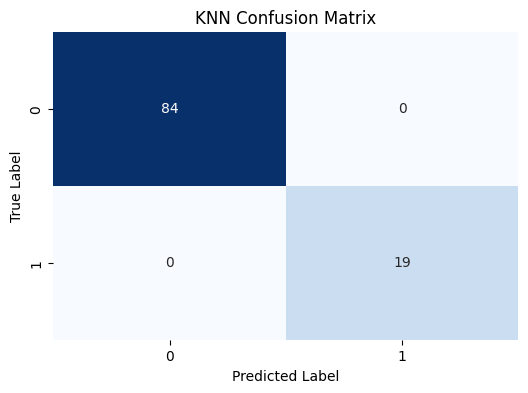

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        19

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

Random Forest Model Accuracy: 100.00%


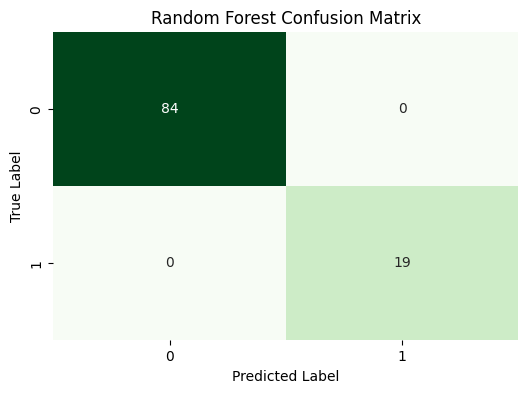

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        19

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

Random Forest Model Accuracy: 100.00%


In [ ]:
# Importing necessary libraries
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Make predictions with KNN model
knn_preds = knn_model.predict(X_test)  # Assuming knn is your KNN model

# Make predictions with Random Forest model
rf_preds = rf_model.predict(X_test)  # Assuming rf is your Random Forest model

# Precision and Recall for KNN
knn_precision = precision_score(y_test, knn_preds, pos_label=1)  # Adjust pos_label based on your class labels
knn_recall = recall_score(y_test, knn_preds, pos_label=1)

print(f"KNN Precision: {knn_precision}")
print(f"KNN Recall: {knn_recall}")

# Precision and Recall for Random Forest
rf_precision = precision_score(y_test, rf_preds, pos_label=1)
rf_recall = recall_score(y_test, rf_preds, pos_label=1)

print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")

# Create a confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_preds)

# Plot confusion matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Create a classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))

# Create accuracy report for KNN
accu = accuracy_score(y_test, knn_preds)
print("Random Forest Model Accuracy: {:.2f}%".format(accu * 100))



# Create a confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Create a classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# Create accuracy report for rf
accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Model Accuracy: {:.2f}%".format(accuracy * 100))


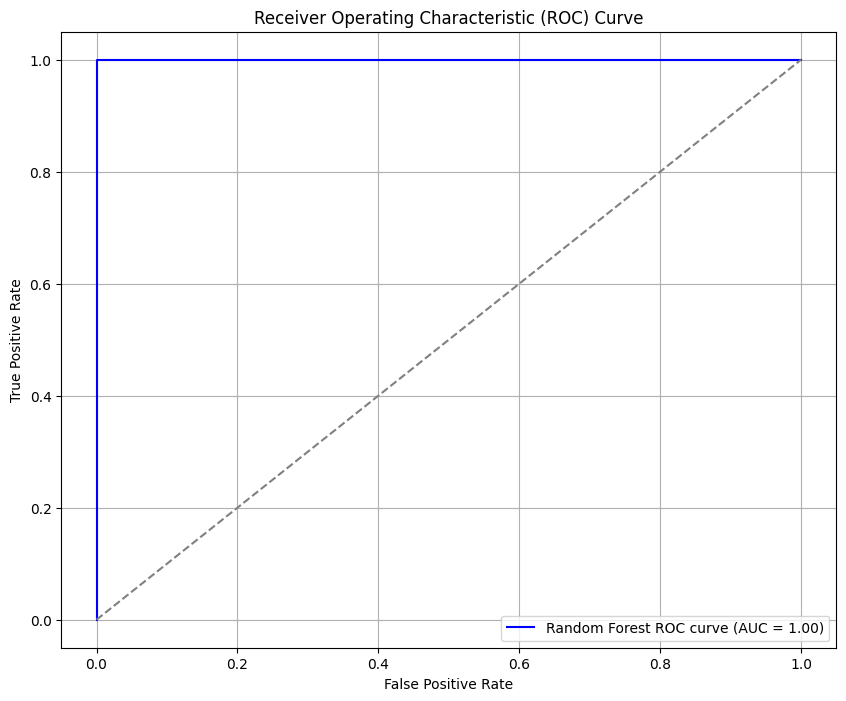

In [ ]:


# Get predicted probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
knn_probs = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest ROC curve (AUC = {rf_auc:.2f})')
#plt.plot(knn_fpr, knn_tpr, color='green', label=f'KNN ROC curve (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



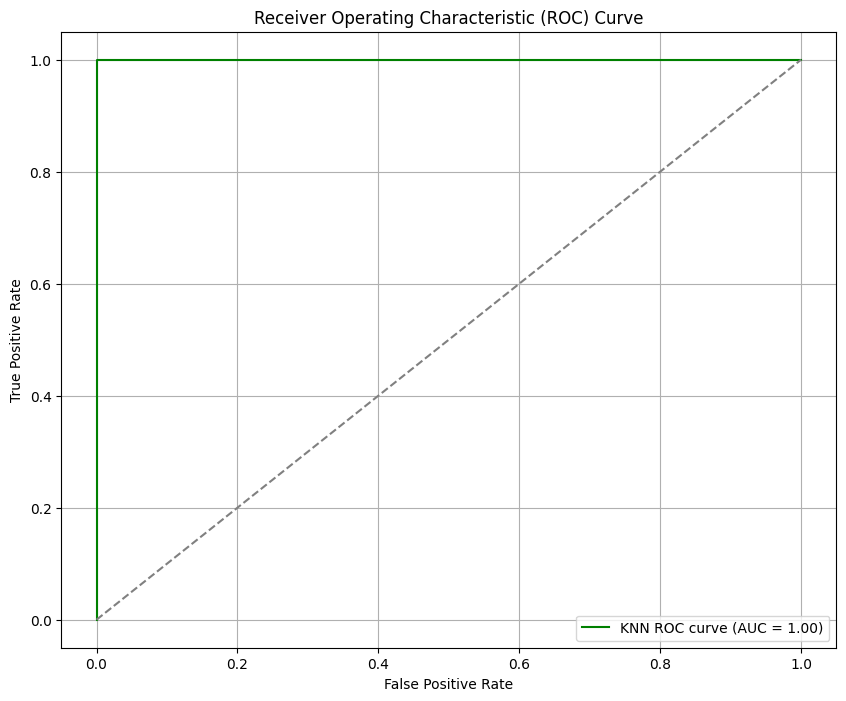

In [ ]:
# Calculate ROC curve and AUC for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(knn_fpr, knn_tpr, color='green', label=f'KNN ROC curve (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


K-Means Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Remove 'Barcode' (or sample names) and the target variable
data_clean = merged_df.drop(columns=['Barcode', 'IDH.specific.DNA.Methylation.Cluster', 'IDH_status'])


In [ ]:
# Normalizing the data (optional)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Step 4: Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)



KMeans(n_clusters=2, random_state=42)

In [ ]:
#Get the cluster labels
clusters = kmeans.labels_

#Add the cluster labels back to the DataFrame
data_clean['Cluster'] = clusters



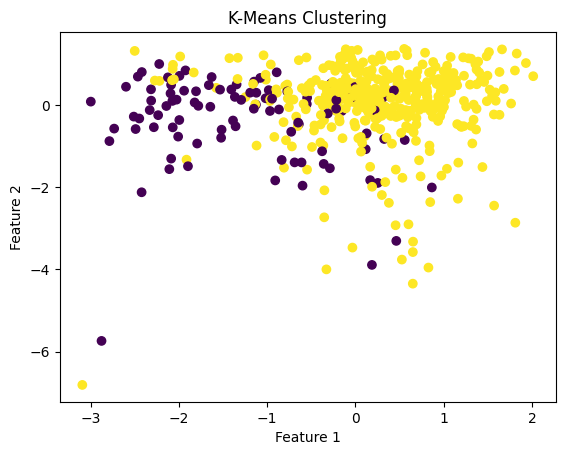

In [ ]:
# Visualize the clustering results (for 2D data)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 7: Save the clustered data with labels
#data_clean.to_csv('clustered_data.csv', index=False)


#Evaluating K-means clustering

In [ ]:
# Inertia (WCSS)
inertia = kmeans.inertia_

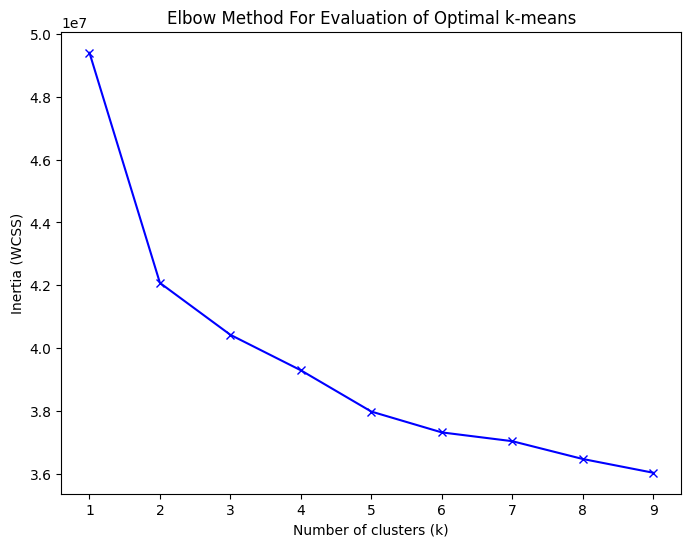

In [ ]:
# Elbow Method to determine the optimal number of clusters
distortions = []
K = range(1, 10)  # Test clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Evaluation of Optimal k-means')
plt.show()
#The Elbow method helps us to determine the optimal number of clusters
#by plotting the inertia (or WCSS) for different numbers of clusters.
#When the reduction in inertia starts to slow down (forming an "elbow"),
#that's often the optimal number of clusters.


In [ ]:
#With our known class labels (IDH_status), we can compare the clusters to the known labels
#to see how well they correspond. We can calculate metrics like the Adjusted Rand Index (ARI)
#or Normalized Mutual Information (NMI) to compare the clustering results to the ground truth.

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# 'IDH_status' is the known labels and 'kmeans.labels_' are the predicted clusters
#data2 is metadata
ari_score = adjusted_rand_score(data2['IDH_status'], kmeans.labels_)
nmi_score = normalized_mutual_info_score(data2['IDH_status'], kmeans.labels_)

print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)

#ARI compares the clustering result with ground truth labels by evaluating
#the number of pairs of points that are either correctly clustered together
#or correctly separated.
#It adjusts for chance by considering how well random cluster assignments would perform.
#Range:
#ARI scores range from -1 to 1.
#1: Perfect match between the predicted clusters and true labels (all points are clustered perfectly).
#0: Clustering result is random and doesn't provide any better-than-chance clustering.
#Negative values: Worse than random clustering.
#What a high ARI score indicates: A high ARI score means that the
#clustering result is very similar to the ground truth labels,
#with minimal random or incorrect assignments.
#It shows that the model correctly grouped similar points together and separated dissimilar ones.

Adjusted Rand Index (ARI): 0.9542625997276333
Normalized Mutual Information (NMI): 0.8948946950522025


NMI is based on the concept of information theory. It measures the amount of information shared between the predicted clusters and true labels. The higher the shared information, the better the clustering matches the true labels.

Range:
NMI scores range from 0 to 1.
1: Perfect correlation between the predicted clusters and true labels (the clusters provide all the information needed to know the true labels).
0: No mutual information between the predicted clusters and true labels (the clustering result doesn't give any useful information about the true labels).
What a high NMI score indicates: A high NMI score indicates that the predicted clusters align well with the true labels, with minimal entropy or uncertainty. The clusters are informative and reflect the true class distribution well.

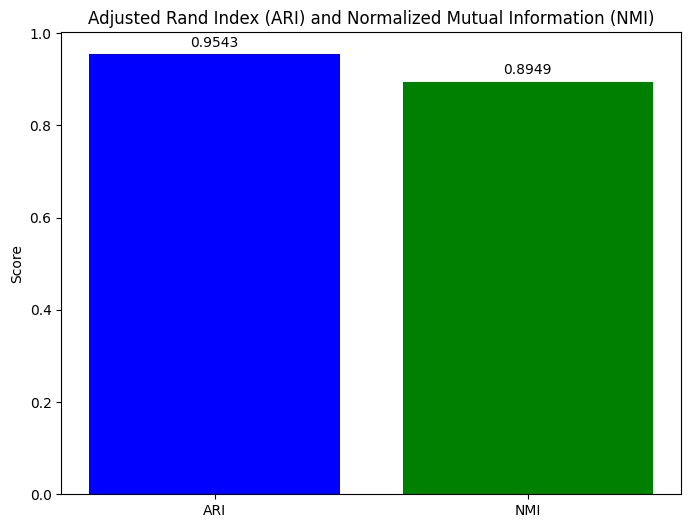

In [ ]:

#Visualize ARI and NMI
import matplotlib.pyplot as plt
import numpy as np

# ARI and NMI scores
scores = [ari_score, nmi_score]
metrics = ['ARI', 'NMI']

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green'])

# Add labels and title
plt.ylabel('Score')
plt.title('Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)')

# Display the values on top of the bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder to convert categorical labels to integers
label_encoder = LabelEncoder()

# Fit and transform the true labels to integers
encoded_true_labels = label_encoder.fit_transform(data2['IDH_status'])

# Create an empty array to hold the mapped labels for predicted clusters
mapped_labels = np.zeros_like(kmeans.labels_)

# Get the unique clusters
unique_clusters = np.unique(kmeans.labels_)

# For each unique cluster, find the most common true label in that cluster
for cluster in unique_clusters:
    # Create a boolean mask for the current cluster
    mask = (kmeans.labels_ == cluster)

    # Get the true labels for the samples in the current cluster
    true_labels_in_cluster = encoded_true_labels[mask]

    # Use np.unique to find the most common true label
    if len(true_labels_in_cluster) > 0:
        most_common_label = np.unique(true_labels_in_cluster, return_counts=True)
        mapped_labels[mask] = most_common_label[0][np.argmax(most_common_label[1])]  # Get the label with the highest count

# Calculate accuracy
accuracy = accuracy_score(encoded_true_labels, mapped_labels)

# Convert to percentage
accuracy_percentage = accuracy * 100

print(f"Accuracy of K-Means Clustering: {accuracy_percentage:.2f}%")


Accuracy of K-Means Clustering: 99.81%
